In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_all = pd.read_csv('../reports/windows/results.csv')
df_all['num_samples'] = pd.Categorical(df_all['num_samples'], ['28k', '56k', '113k', 'all'])

## Evaluate ensemble performance

In [3]:
all_w = df_all[df_all['num_samples'] == 'all']

In [4]:
def get_experiment(num_samples):
    return df_all[(df_all['num_samples'] == num_samples)]


def plot_horizontal_ensembles(experiment_df, ax=None, title=None):

    emax = int(experiment_df['epoch'].max())

    if not ax:
        ax = plt.subplot(111)
        plt.figure(figsize=(16, 8))

    for n in sorted(experiment_df['num'].unique()):
        if not n >= 0:
            continue
        tmp = experiment_df[experiment_df['num'] == n]
        base = tmp[~tmp['ensemble']].dropna()
        ax.plot(range(1, emax+1), base['smape'], c='0.5', alpha=0.5)
        ens = tmp[tmp['ensemble']].dropna()
        ax.plot(range(1, emax+1), ens['smape'], c='C0', alpha=0.5)
        ax.scatter([emax], list(experiment_df[(experiment_df['epoch'].isna()) & (experiment_df['num'].isna())]['smape']), c='C1', marker='x')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    ax.set_title(title)

    
def plot_regular_ensembles(experiment_df, ax=None, title=None):

    emax = int(experiment_df['epoch'].max())
    
    if not ax:
        ax = plt.subplot(111)
        plt.figure(figsize=(16, 8))

    for n in sorted(experiment_df['num'].unique()):
        if not n >= 0:
            continue
        tmp = experiment_df[experiment_df['num'] == n]
        base = tmp[~tmp['ensemble']].dropna()
        ax.plot(range(1, emax+1), base['smape'], c='0.5', alpha=0.5)    

    ens = experiment_df[experiment_df['num'].isna() & df_all['epoch'].notna()]

    ax.plot(range(1, emax+1), ens['smape'], c='C0', alpha=0.5)
    ax.scatter([emax], list(experiment_df[experiment_df['num'] < 0]['smape']), c='C1', marker='x')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(title)

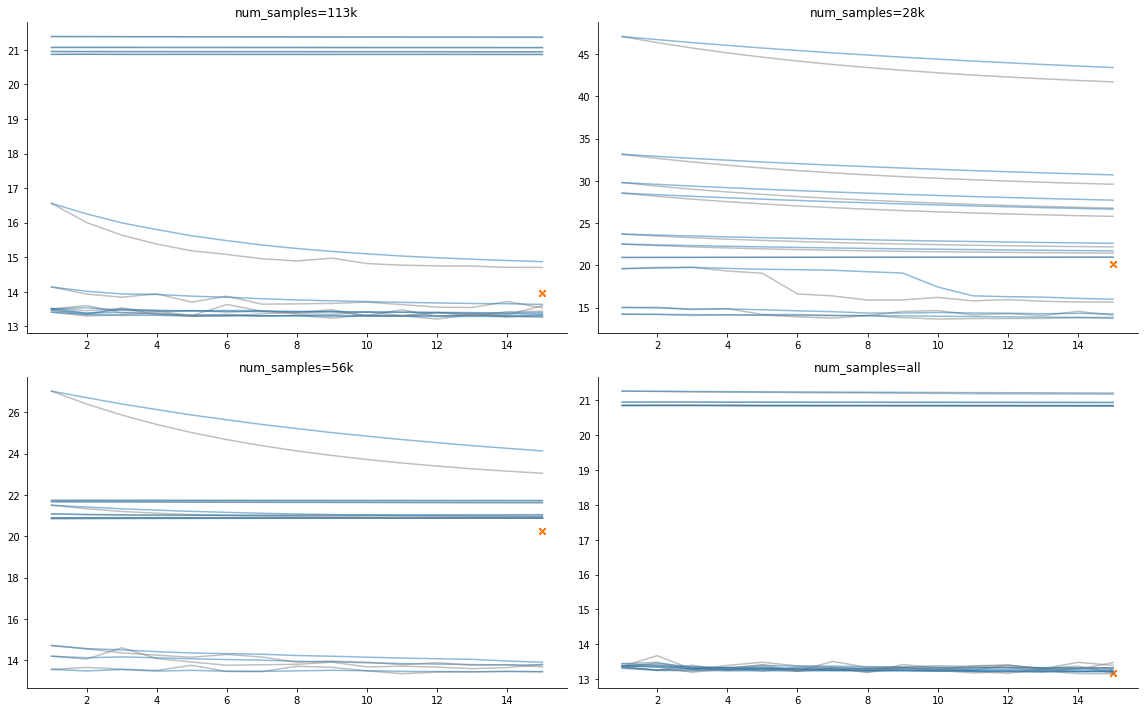

In [5]:
plt.figure(figsize=(16, 10))

for i, num_samples in enumerate(df_all['num_samples'].unique()):
    ax = plt.subplot(2, 2, i+1)
    ex = get_experiment(num_samples)
    title = 'num_samples={}'.format(num_samples)
    plot_horizontal_ensembles(ex, ax=ax, title=title)
    
plt.tight_layout()

## Experiment comparison

In [6]:
df = df_all[(df_all['ensemble']) & ((df_all['epoch'].isna()) | (df_all['epoch'] == 14))]

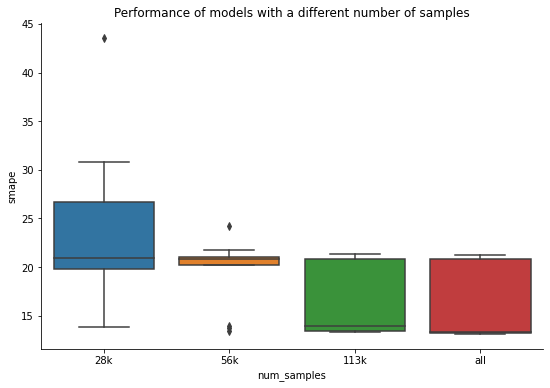

In [7]:
plt.figure(figsize=(9, 6))
ax = sns.boxplot(x='num_samples', y='smape', data=df)

ax.set_title('Performance of models with a different number of samples')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [8]:
df[(df['epoch'].isna())].sort_values('num_samples')[['num_samples', 'smape']]

,num_samples,smape
632,28k,20.192023
633,28k,20.270900
949,56k,20.258336
950,56k,20.261929
315,113k,13.978782
316,113k,13.983031
1266,all,13.174107
1267,all,13.156584
